In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [5]:
cornbelters_files = glob.glob("../CornBeltersData/*.csv")


# Read and concatenate all CSVs into one DataFrame
data = [pd.read_csv(f) for f in cornbelters_files]
df = pd.concat(data, ignore_index=True)

In [6]:
# Example pitcher name
pitcher_name = "Zach O'donnell"

# Define all possible counts as strings
counts = ['0-0', '0-1', '0-2', '1-0', '1-1', '1-2', '2-0', '2-1', '2-2', '3-0', '3-1', '3-2']

# Create a new column for count as string
df['Count'] = df['Balls'].astype(str) + '-' + df['Strikes'].astype(str)

# Filter for the pitcher
df_pitcher = df[df['Pitcher'] == pitcher_name]

# Pivot table: index=pitch type, columns=count, values=counts
usage_table = pd.pivot_table(
    df_pitcher,
    index='TaggedPitchType',
    columns='Count',
    values='PitchNo',
    aggfunc='count',
    fill_value=0
)

# Calculate usage % for each count (column)
usage_pct = usage_table.div(usage_table.sum(axis=0), axis=1) * 100

# Reindex columns to ensure all counts are present and in order
usage_pct = usage_pct.reindex(columns=counts, fill_value=0)

# Sort pitch types alphabetically
usage_pct = usage_pct.sort_index()

# Display the usage percentage table
usage_pct

Count,0-0,0-1,0-2,1-0,1-1,1-2,2-0,2-1,2-2,3-0,3-1,3-2
TaggedPitchType,,,,,,,,,,,,
Changeup,4.761905,0.0,33.333333,0.0,14.285714,0.0,0.000000,0.000000,100.0,0.0,0.0,0.0
Curveball,0.000000,12.5,0.000000,0.0,0.000000,50.0,0.000000,0.000000,0.0,0.0,0.0,0.0
Cutter,4.761905,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
Fastball,66.666667,37.5,33.333333,37.5,71.428571,0.0,33.333333,71.428571,0.0,100.0,50.0,100.0
Slider,23.809524,50.0,33.333333,62.5,14.285714,50.0,66.666667,28.571429,0.0,0.0,50.0,0.0


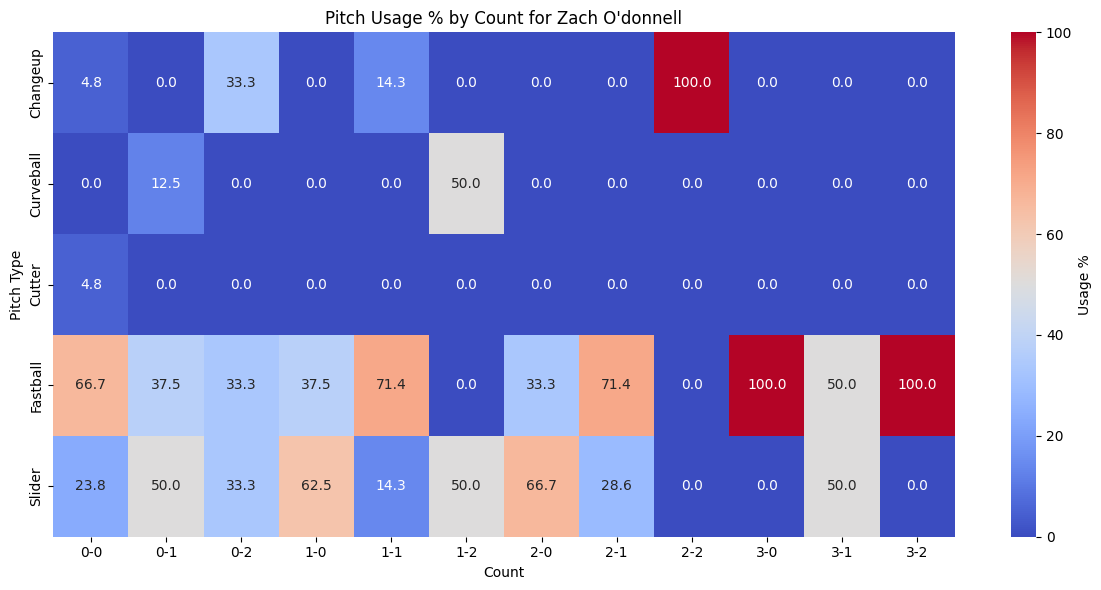

In [8]:
# Plot the usage percentage table as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(usage_pct, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Usage %'})
plt.title(f"Pitch Usage % by Count for {pitcher_name}")
plt.ylabel("Pitch Type")
plt.xlabel("Count")
plt.tight_layout()
plt.show()